# Importing Libraries and datasets

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split

from sklearn.linear_model import LinearRegression, Ridge
R = Ridge()

from sklearn.ensemble import RandomForestRegressor
RF = RandomForestRegressor()

from sklearn.metrics import r2_score, mean_squared_error, mean_absolute_error

import warnings
warnings.filterwarnings("ignore", category=FutureWarning)

In [ ]:
mat = pd.read_csv("/content/student-mat.csv")
por = pd.read_csv("/content/student-por.csv")

In [ ]:
data = pd.concat([mat,por])

# Exploratory Data Analysis

In [ ]:
data.head()

,school,sex,age,address,famsize,Pstatus,Medu,Fedu,Mjob,Fjob,reason,guardian,traveltime,studytime,failures,schoolsup,famsup,paid,activities,nursery,higher,internet,romantic,famrel,freetime,goout,Dalc,Walc,health,absences,G1,G2,G3
0,GP,F,18,U,GT3,A,4,4,at_home,teacher,course,mother,2,2,0,yes,no,no,no,yes,yes,no,no,4,3,4,1,1,3,6,5,6,6
1,GP,F,17,U,GT3,T,1,1,at_home,other,course,father,1,2,0,no,yes,no,no,no,yes,yes,no,5,3,3,1,1,3,4,5,5,6
2,GP,F,15,U,LE3,T,1,1,at_home,other,other,mother,1,2,3,yes,no,yes,no,yes,yes,yes,no,4,3,2,2,3,3,10,7,8,10
3,GP,F,15,U,GT3,T,4,2,health,services,home,mother,1,3,0,no,yes,yes,yes,yes,yes,yes,yes,3,2,2,1,1,5,2,15,14,15
4,GP,F,16,U,GT3,T,3,3,other,other,home,father,1,2,0,no,yes,yes,no,yes,yes,no,no,4,3,2,1,2,5,4,6,10,10


In [ ]:
data.tail()

,school,sex,age,address,famsize,Pstatus,Medu,Fedu,Mjob,Fjob,reason,guardian,traveltime,studytime,failures,schoolsup,famsup,paid,activities,nursery,higher,internet,romantic,famrel,freetime,goout,Dalc,Walc,health,absences,G1,G2,G3
644,MS,F,19,R,GT3,T,2,3,services,other,course,mother,1,3,1,no,no,no,yes,no,yes,yes,no,5,4,2,1,2,5,4,10,11,10
645,MS,F,18,U,LE3,T,3,1,teacher,services,course,mother,1,2,0,no,yes,no,no,yes,yes,yes,no,4,3,4,1,1,1,4,15,15,16
646,MS,F,18,U,GT3,T,1,1,other,other,course,mother,2,2,0,no,no,no,yes,yes,yes,no,no,1,1,1,1,1,5,6,11,12,9
647,MS,M,17,U,LE3,T,3,1,services,services,course,mother,2,1,0,no,no,no,no,no,yes,yes,no,2,4,5,3,4,2,6,10,10,10
648,MS,M,18,R,LE3,T,3,2,services,other,course,mother,3,1,0,no,no,no,no,no,yes,yes,no,4,4,1,3,4,5,4,10,11,11


In [ ]:
data.shape

(1044, 33)

In [ ]:
data.columns

Index(['school', 'sex', 'age', 'address', 'famsize', 'Pstatus', 'Medu', 'Fedu',
       'Mjob', 'Fjob', 'reason', 'guardian', 'traveltime', 'studytime',
       'failures', 'schoolsup', 'famsup', 'paid', 'activities', 'nursery',
       'higher', 'internet', 'romantic', 'famrel', 'freetime', 'goout', 'Dalc',
       'Walc', 'health', 'absences', 'G1', 'G2', 'G3'],
      dtype='object')

In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1044 entries, 0 to 648
Data columns (total 33 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   school      1044 non-null   object
 1   sex         1044 non-null   object
 2   age         1044 non-null   int64 
 3   address     1044 non-null   object
 4   famsize     1044 non-null   object
 5   Pstatus     1044 non-null   object
 6   Medu        1044 non-null   int64 
 7   Fedu        1044 non-null   int64 
 8   Mjob        1044 non-null   object
 9   Fjob        1044 non-null   object
 10  reason      1044 non-null   object
 11  guardian    1044 non-null   object
 12  traveltime  1044 non-null   int64 
 13  studytime   1044 non-null   int64 
 14  failures    1044 non-null   int64 
 15  schoolsup   1044 non-null   object
 16  famsup      1044 non-null   object
 17  paid        1044 non-null   object
 18  activities  1044 non-null   object
 19  nursery     1044 non-null   object
 20  higher   

In [ ]:
data.describe()

,age,Medu,Fedu,traveltime,studytime,failures,famrel,freetime,goout,Dalc,Walc,health,absences,G1,G2,G3
count,1044.000000,1044.000000,1044.000000,1044.000000,1044.000000,1044.000000,1044.000000,1044.000000,1044.000000,1044.000000,1044.000000,1044.000000,1044.000000,1044.000000,1044.000000,1044.000000
mean,16.726054,2.603448,2.387931,1.522989,1.970307,0.264368,3.935824,3.201149,3.156130,1.494253,2.284483,3.543103,4.434866,11.213602,11.246169,11.341954
std,1.239975,1.124907,1.099938,0.731727,0.834353,0.656142,0.933401,1.031507,1.152575,0.911714,1.285105,1.424703,6.210017,2.983394,3.285071,3.864796
min,15.000000,0.000000,0.000000,1.000000,1.000000,0.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000
25%,16.000000,2.000000,1.000000,1.000000,1.000000,0.000000,4.000000,3.000000,2.000000,1.000000,1.000000,3.000000,0.000000,9.000000,9.000000,10.000000
50%,17.000000,3.000000,2.000000,1.000000,2.000000,0.000000,4.000000,3.000000,3.000000,1.000000,2.000000,4.000000,2.000000,11.000000,11.000000,11.000000
75%,18.000000,4.000000,3.000000,2.000000,2.000000,0.000000,5.000000,4.000000,4.000000,2.000000,3.000000,5.000000,6.000000,13.000000,13.000000,14.000000
max,22.000000,4.000000,4.000000,4.000000,4.000000,3.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,75.000000,19.000000,19.000000,20.000000


# Visualizing the data

## Correlation among variables

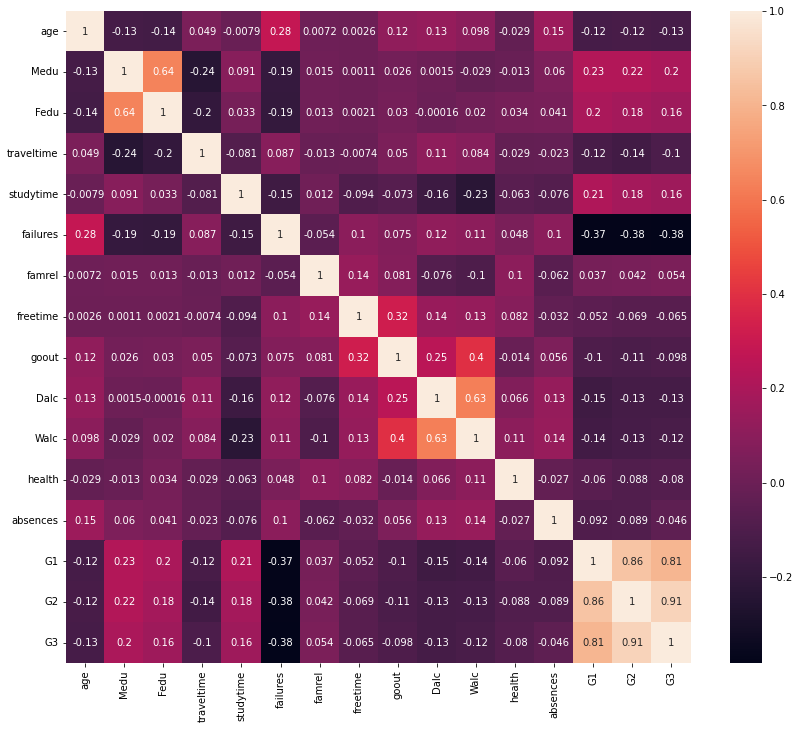

In [ ]:
plt.figure(figsize=(14, 12))
sns.heatmap(data.corr(), annot=True)
plt.show()

## Dividing features into continous, ordinal, nominal and binary

In [ ]:
cont = ["age", "absences", "G1", "G2", "G3"]
ordin = ["Medu", "Fedu", "traveltime", "studytime", "failures", "famrel", "freetime", "goout", "Dalc", "Walc", "health"]
nom = ["Mjob", "Fjob", "reason", "guardian"]
binary = ["school", "sex", "address", "famsize", "Pstatus", "schoolsup", "famsup", "paid", "activities", "nursery", "higher", "internet", "romantic"]

## Distribution of continous variables

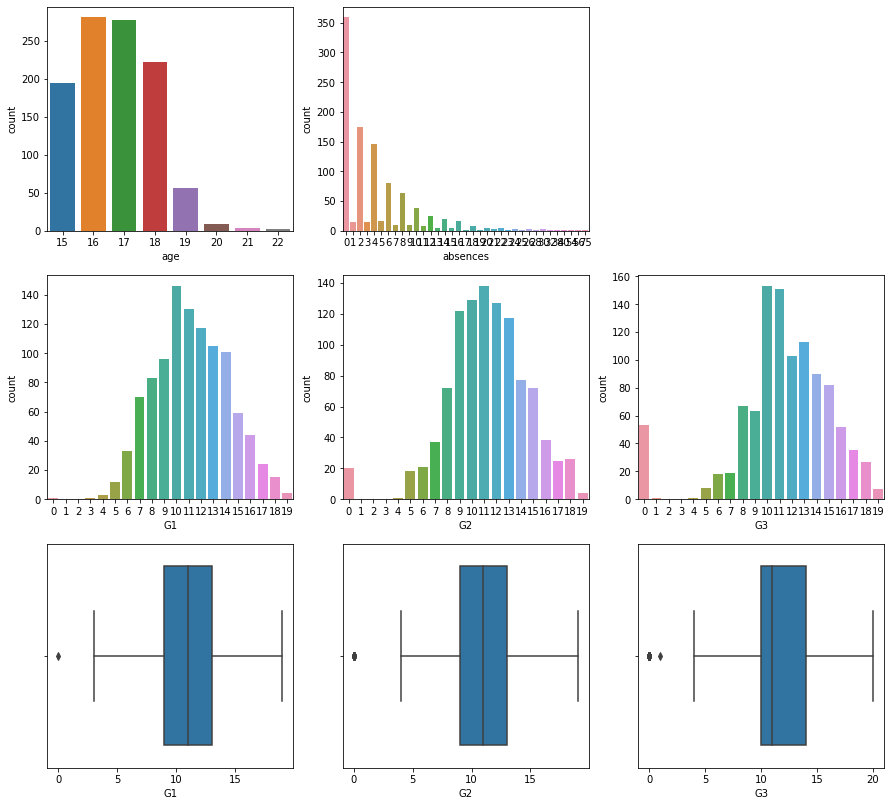

In [ ]:
import matplotlib.gridspec as gs
fig = plt.figure(figsize = (15,14))
g = gs.GridSpec(nrows = 3, ncols = 3, figure = fig)
i = 0

ax1 = plt.subplot(g[0,0])
ax1 = sns.countplot(data[cont[0]])

ax2 = plt.subplot(g[0,1])
ax2 = sns.countplot(data[cont[1]])

rg = list(range(0,20))
for feature in cont[2:]:
    ax = plt.subplot(g[1,i])
    ax = sns.countplot(data[feature], order = rg)
    i = i+1
i = 0
for feature in cont[2:]:
    ax = plt.subplot(g[2,i])
    ax = sns.boxplot(data = data, x = data[feature], order = rg)
    i = i+1

In [ ]:
def with_hue(plot, feature, Number_of_categories, hue_categories):
    a = [p.get_height() for p in plot.patches]
    patch = [p for p in plot.patches]
    for i in range(Number_of_categories):
        total = feature.value_counts().values[i]
        for j in range(hue_categories):
            percentage = '{:.1f}%'.format(100 * a[(j*Number_of_categories + i)]/total)
            x = patch[(j*Number_of_categories + i)].get_x() + patch[(j*Number_of_categories + i)].get_width() / 2 - 0.15
            y = patch[(j*Number_of_categories + i)].get_y() + patch[(j*Number_of_categories + i)].get_height() 
            plot.annotate(percentage, (x, y), size = 12)
   # plt.show()

def without_hue(plot, feature):
    total = len(feature)
    for p in plot.patches:
        percentage = '{:.1f}%'.format(100 * p.get_height()/total)
        x = p.get_x() + p.get_width() / 2 - 0.2
        y = p.get_y() + p.get_height()
        plot.annotate(percentage, (x, y), size = 12)
    #plt.show()

## Distribution of ordinal variables

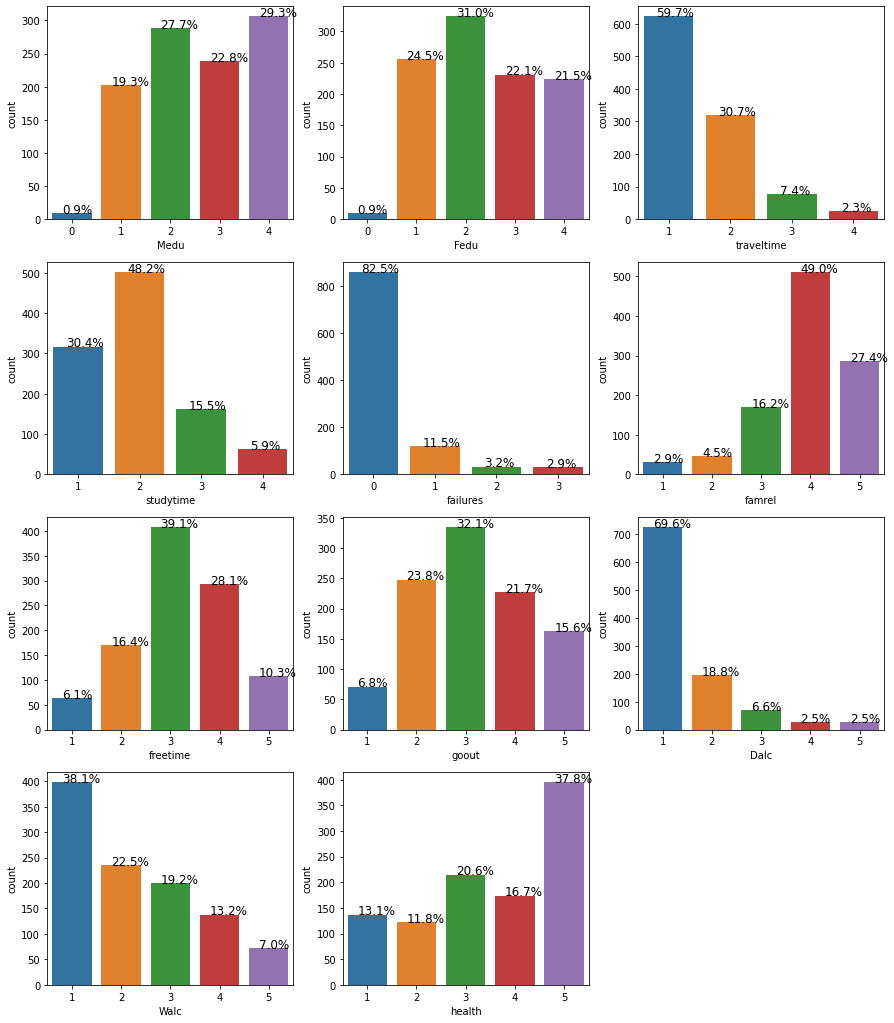

In [ ]:
fig = plt.figure(figsize = (15,18))
g = gs.GridSpec(nrows = 4, ncols = 3, figure = fig)
i = 0
j = 0
for feature in ordin:
    if j == 3:
        i = i + 1
        j = 0
    ax1 = plt.subplot(g[i,j])
    ax1 = sns.countplot(data[feature])
    without_hue(ax1,data[feature])
    j = j + 1

## Distribution of nominal variables

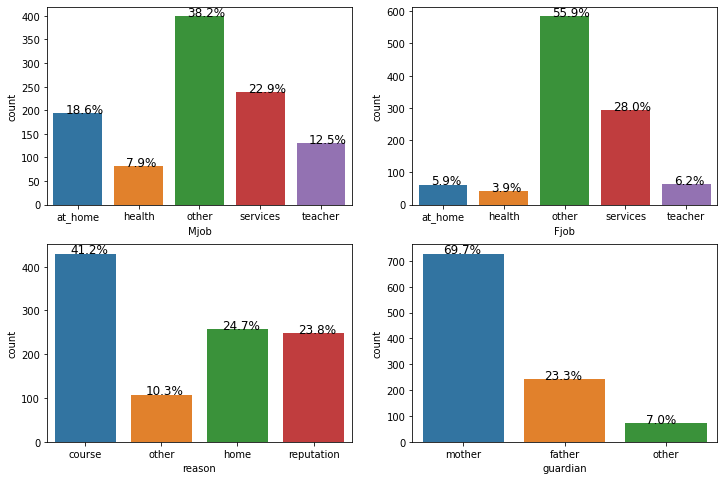

In [ ]:
fig = plt.figure(figsize = (12,8))
g = gs.GridSpec(nrows = 2, ncols = 2, figure = fig)

ax1 = plt.subplot(g[0,0])
ax1 = sns.countplot(data[nom[0]])
without_hue(ax1,data[nom[0]])

ax2 = plt.subplot(g[0,1])
ax2 = sns.countplot(data[nom[1]], order = ["at_home", "health", "other", "services", "teacher"])
without_hue(ax2,data[nom[1]])

ax3 = plt.subplot(g[1,0])
ax3 = sns.countplot(data[nom[2]])
without_hue(ax3,data[nom[2]])

ax4 = plt.subplot(g[1,1])
ax4 = sns.countplot(data[nom[3]])
without_hue(ax4,data[nom[3]])

## Distribution of binary variables

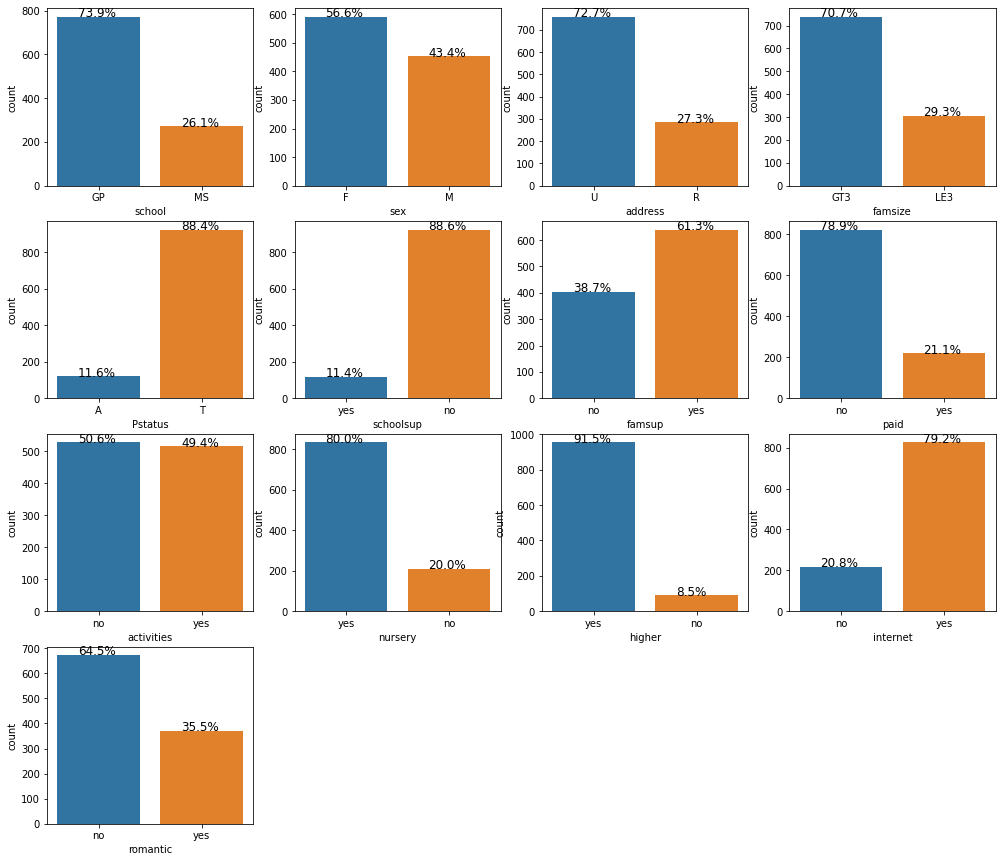

In [ ]:
fig = plt.figure(figsize = (17,15))
g = gs.GridSpec(nrows = 4, ncols = 4, figure = fig)
i = 0
j = 0
for feature in binary:
    if j == 4:
        i = i + 1
        j = 0
    ax1 = plt.subplot(g[i,j])
    ax1 = sns.countplot(data[feature])
    without_hue(ax1,data[feature])
    j = j + 1

## Finding students' performance on the basis of - 

**Gender**

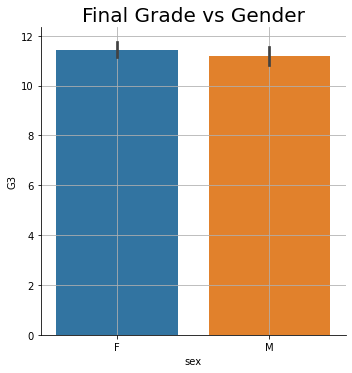

In [ ]:
sns.catplot(y='G3',x='sex',data=data,kind='bar')
plt.title('Final Grade vs Gender',size=20)
plt.grid()

**Age**

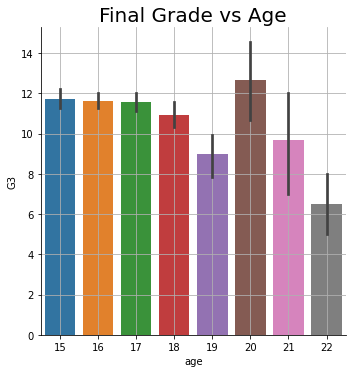

In [ ]:
sns.catplot(y='G3',x='age',data=data,kind='bar')
plt.title('Final Grade vs Age',size=20)
plt.grid()

**No of classes failed**

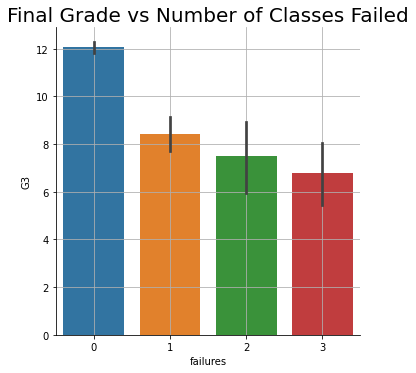

In [ ]:
sns.catplot(y='G3',x='failures',data=data,kind='bar')
plt.title('Final Grade vs Number of Classes Failed',size=20)
plt.grid()

**Study time**

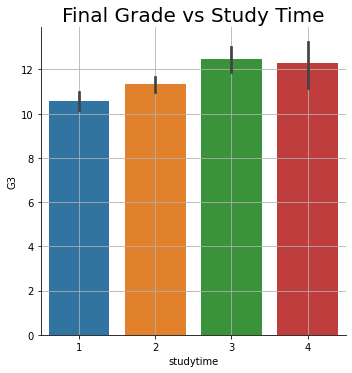

In [ ]:
sns.catplot(y='G3',x='studytime',data=data,kind='bar')
plt.title('Final Grade vs Study Time',size=20)
plt.grid()

**Internet connectivity**

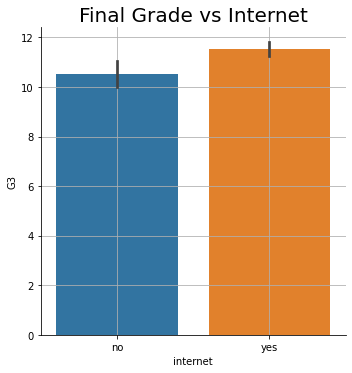

In [ ]:
sns.catplot(y='G3',x='internet',data=data,kind='bar')
plt.title('Final Grade vs Internet',size=20)
plt.grid()

**Leisure period**

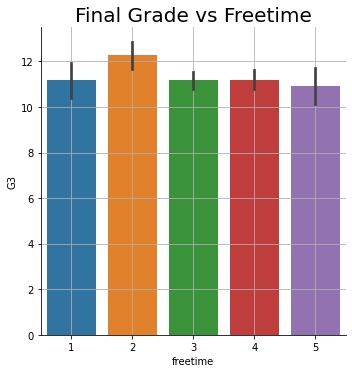

In [ ]:
sns.catplot(y='G3',x='freetime',data=data,kind='bar')
plt.title('Final Grade vs Freetime',size=20)
plt.grid()

**Quality of family relationship**

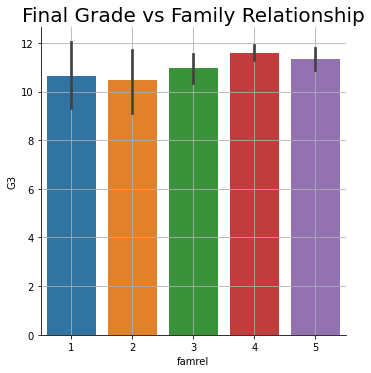

In [ ]:
sns.catplot(y='G3',x='famrel',data=data,kind='bar')
plt.title('Final Grade vs Family Relationship',size=20)
plt.grid()

**Mother's education**

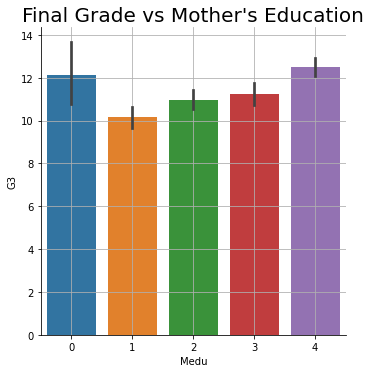

In [ ]:
sns.catplot(y='G3',x='Medu',data=data,kind='bar')
plt.title('Final Grade vs Mother\'s Education',size=20)
plt.grid()

**Father's education**

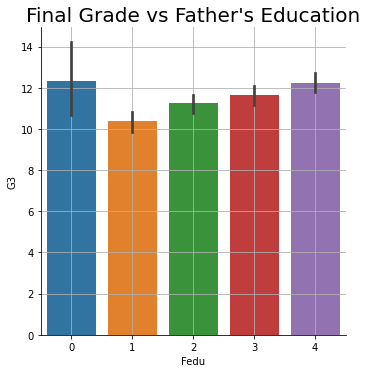

In [ ]:
sns.catplot(y='G3',x='Fedu',data=data,kind='bar')
plt.title('Final Grade vs Father\'s Education',size=20)
plt.grid()

**Parenting Status**

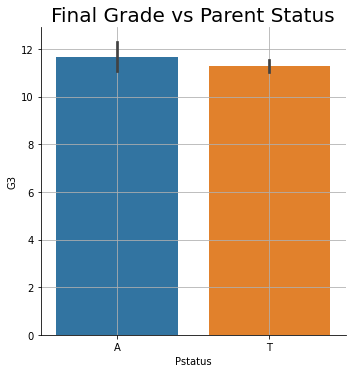

In [ ]:
sns.catplot(y='G3',x='Pstatus',data=data,kind='bar')
plt.title('Final Grade vs Parent Status',size=20)
plt.grid()

**Daily alcohol consumption**

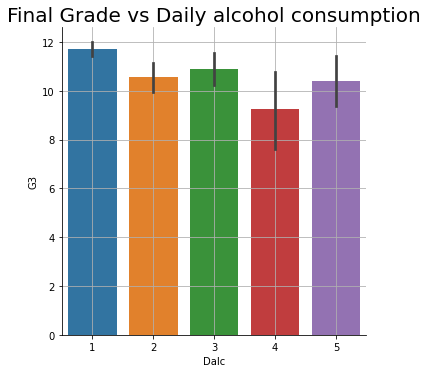

In [ ]:
sns.catplot(y='G3',x='Dalc',data=data,kind='bar')
plt.title('Final Grade vs Daily alcohol consumption',size=20)
plt.grid()

There are several factors which are also important for building and developing the model and generating the results obtained, which we have proceeded further. 

# Data Pre-preprocessing

## Checking missing values

In [ ]:
data.isnull().sum()

school        0
sex           0
age           0
address       0
famsize       0
Pstatus       0
Medu          0
Fedu          0
Mjob          0
Fjob          0
reason        0
guardian      0
traveltime    0
studytime     0
failures      0
schoolsup     0
famsup        0
paid          0
activities    0
nursery       0
higher        0
internet      0
romantic      0
famrel        0
freetime      0
goout         0
Dalc          0
Walc          0
health        0
absences      0
G1            0
G2            0
G3            0
dtype: int64

## Encoding

In [ ]:
data.dtypes

school        object
sex           object
age            int64
address       object
famsize       object
Pstatus       object
Medu           int64
Fedu           int64
Mjob          object
Fjob          object
reason        object
guardian      object
traveltime     int64
studytime      int64
failures       int64
schoolsup     object
famsup        object
paid          object
activities    object
nursery       object
higher        object
internet      object
romantic      object
famrel         int64
freetime       int64
goout          int64
Dalc           int64
Walc           int64
health         int64
absences       int64
G1             int64
G2             int64
G3             int64
dtype: object

In [ ]:
nonnumeric_columns = [data.columns[index] for index, dtype in enumerate(data.dtypes) if dtype == 'object']
nonnumeric_columns

['school',
 'sex',
 'address',
 'famsize',
 'Pstatus',
 'Mjob',
 'Fjob',
 'reason',
 'guardian',
 'schoolsup',
 'famsup',
 'paid',
 'activities',
 'nursery',
 'higher',
 'internet',
 'romantic']

In [ ]:
for column in nonnumeric_columns:
    print(f"{column}: {data[column].unique()}")

school: ['GP' 'MS']
sex: ['F' 'M']
address: ['U' 'R']
famsize: ['GT3' 'LE3']
Pstatus: ['A' 'T']
Mjob: ['at_home' 'health' 'other' 'services' 'teacher']
Fjob: ['teacher' 'other' 'services' 'health' 'at_home']
reason: ['course' 'other' 'home' 'reputation']
guardian: ['mother' 'father' 'other']
schoolsup: ['yes' 'no']
famsup: ['no' 'yes']
paid: ['no' 'yes']
activities: ['no' 'yes']
nursery: ['yes' 'no']
higher: ['yes' 'no']
internet: ['no' 'yes']
romantic: ['no' 'yes']


In [ ]:
data['Mjob'] = data['Mjob'].apply(lambda x: "m_" + x)
data['Fjob'] = data['Fjob'].apply(lambda x: "f_" + x)
data['reason'] = data['reason'].apply(lambda x: "r_" + x)
data['guardian'] = data['guardian'].apply(lambda x: "g_" + x)

In [ ]:
data

,school,sex,age,address,famsize,Pstatus,Medu,Fedu,Mjob,Fjob,reason,guardian,traveltime,studytime,failures,schoolsup,famsup,paid,activities,nursery,higher,internet,romantic,famrel,freetime,goout,Dalc,Walc,health,absences,G1,G2,G3
0,GP,F,18,U,GT3,A,4,4,m_at_home,f_teacher,r_course,g_mother,2,2,0,yes,no,no,no,yes,yes,no,no,4,3,4,1,1,3,6,5,6,6
1,GP,F,17,U,GT3,T,1,1,m_at_home,f_other,r_course,g_father,1,2,0,no,yes,no,no,no,yes,yes,no,5,3,3,1,1,3,4,5,5,6
2,GP,F,15,U,LE3,T,1,1,m_at_home,f_other,r_other,g_mother,1,2,3,yes,no,yes,no,yes,yes,yes,no,4,3,2,2,3,3,10,7,8,10
3,GP,F,15,U,GT3,T,4,2,m_health,f_services,r_home,g_mother,1,3,0,no,yes,yes,yes,yes,yes,yes,yes,3,2,2,1,1,5,2,15,14,15
4,GP,F,16,U,GT3,T,3,3,m_other,f_other,r_home,g_father,1,2,0,no,yes,yes,no,yes,yes,no,no,4,3,2,1,2,5,4,6,10,10
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
644,MS,F,19,R,GT3,T,2,3,m_services,f_other,r_course,g_mother,1,3,1,no,no,no,yes,no,yes,yes,no,5,4,2,1,2,5,4,10,11,10
645,MS,F,18,U,LE3,T,3,1,m_teacher,f_services,r_course,g_mother,1,2,0,no,yes,no,no,yes,yes,yes,no,4,3,4,1,1,1,4,15,15,16
646,MS,F,18,U,GT3,T,1,1,m_other,f_other,r_course,g_mother,2,2,0,no,no,no,yes,yes,yes,no,no,1,1,1,1,1,5,6,11,12,9
647,MS,M,17,U,LE3,T,3,1,m_services,f_services,r_course,g_mother,2,1,0,no,no,no,no,no,yes,yes,no,2,4,5,3,4,2,6,10,10,10


In [ ]:
dummies = pd.concat([pd.get_dummies(data['Mjob']),
                     pd.get_dummies(data['Fjob']),
                     pd.get_dummies(data['reason']),
                     pd.get_dummies(data['guardian'])],
                     axis=1)
dummies

,m_at_home,m_health,m_other,m_services,m_teacher,f_at_home,f_health,f_other,f_services,f_teacher,r_course,r_home,r_other,r_reputation,g_father,g_mother,g_other
0,1,0,0,0,0,0,0,0,0,1,1,0,0,0,0,1,0
1,1,0,0,0,0,0,0,1,0,0,1,0,0,0,1,0,0
2,1,0,0,0,0,0,0,1,0,0,0,0,1,0,0,1,0
3,0,1,0,0,0,0,0,0,1,0,0,1,0,0,0,1,0
4,0,0,1,0,0,0,0,1,0,0,0,1,0,0,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
644,0,0,0,1,0,0,0,1,0,0,1,0,0,0,0,1,0
645,0,0,0,0,1,0,0,0,1,0,1,0,0,0,0,1,0
646,0,0,1,0,0,0,0,1,0,0,1,0,0,0,0,1,0
647,0,0,0,1,0,0,0,0,1,0,1,0,0,0,0,1,0


In [ ]:
data = pd.concat([data, dummies], axis=1)

data.drop(['Mjob', 'Fjob', 'reason', 'guardian'], axis=1, inplace=True)
data

,school,sex,age,address,famsize,Pstatus,Medu,Fedu,traveltime,studytime,failures,schoolsup,famsup,paid,activities,nursery,higher,internet,romantic,famrel,freetime,goout,Dalc,Walc,health,absences,G1,G2,G3,m_at_home,m_health,m_other,m_services,m_teacher,f_at_home,f_health,f_other,f_services,f_teacher,r_course,r_home,r_other,r_reputation,g_father,g_mother,g_other
0,GP,F,18,U,GT3,A,4,4,2,2,0,yes,no,no,no,yes,yes,no,no,4,3,4,1,1,3,6,5,6,6,1,0,0,0,0,0,0,0,0,1,1,0,0,0,0,1,0
1,GP,F,17,U,GT3,T,1,1,1,2,0,no,yes,no,no,no,yes,yes,no,5,3,3,1,1,3,4,5,5,6,1,0,0,0,0,0,0,1,0,0,1,0,0,0,1,0,0
2,GP,F,15,U,LE3,T,1,1,1,2,3,yes,no,yes,no,yes,yes,yes,no,4,3,2,2,3,3,10,7,8,10,1,0,0,0,0,0,0,1,0,0,0,0,1,0,0,1,0
3,GP,F,15,U,GT3,T,4,2,1,3,0,no,yes,yes,yes,yes,yes,yes,yes,3,2,2,1,1,5,2,15,14,15,0,1,0,0,0,0,0,0,1,0,0,1,0,0,0,1,0
4,GP,F,16,U,GT3,T,3,3,1,2,0,no,yes,yes,no,yes,yes,no,no,4,3,2,1,2,5,4,6,10,10,0,0,1,0,0,0,0,1,0,0,0,1,0,0,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
644,MS,F,19,R,GT3,T,2,3,1,3,1,no,no,no,yes,no,yes,yes,no,5,4,2,1,2,5,4,10,11,10,0,0,0,1,0,0,0,1,0,0,1,0,0,0,0,1,0
645,MS,F,18,U,LE3,T,3,1,1,2,0,no,yes,no,no,yes,yes,yes,no,4,3,4,1,1,1,4,15,15,16,0,0,0,0,1,0,0,0,1,0,1,0,0,0,0,1,0
646,MS,F,18,U,GT3,T,1,1,2,2,0,no,no,no,yes,yes,yes,no,no,1,1,1,1,1,5,6,11,12,9,0,0,1,0,0,0,0,1,0,0,1,0,0,0,0,1,0
647,MS,M,17,U,LE3,T,3,1,2,1,0,no,no,no,no,no,yes,yes,no,2,4,5,3,4,2,6,10,10,10,0,0,0,1,0,0,0,0,1,0,1,0,0,0,0,1,0


In [ ]:
nonnumeric_columns = [data.columns[index] for index, dtype in enumerate(data.dtypes) if dtype == 'object']

for column in nonnumeric_columns:
    print(f"{column}: {data[column].unique()}")

school: ['GP' 'MS']
sex: ['F' 'M']
address: ['U' 'R']
famsize: ['GT3' 'LE3']
Pstatus: ['A' 'T']
schoolsup: ['yes' 'no']
famsup: ['no' 'yes']
paid: ['no' 'yes']
activities: ['no' 'yes']
nursery: ['yes' 'no']
higher: ['yes' 'no']
internet: ['no' 'yes']
romantic: ['no' 'yes']


In [ ]:
encoder = LabelEncoder()

for column in nonnumeric_columns:
    data[column] = encoder.fit_transform(data[column])

In [ ]:
for dtype in data.dtypes:
    print(dtype)

int64
int64
int64
int64
int64
int64
int64
int64
int64
int64
int64
int64
int64
int64
int64
int64
int64
int64
int64
int64
int64
int64
int64
int64
int64
int64
int64
int64
int64
uint8
uint8
uint8
uint8
uint8
uint8
uint8
uint8
uint8
uint8
uint8
uint8
uint8
uint8
uint8
uint8
uint8


In [ ]:
y = data['G3']
X = data.drop('G3', axis=1)

## Scaling

In [ ]:
X

,school,sex,age,address,famsize,Pstatus,Medu,Fedu,traveltime,studytime,failures,schoolsup,famsup,paid,activities,nursery,higher,internet,romantic,famrel,freetime,goout,Dalc,Walc,health,absences,G1,G2,m_at_home,m_health,m_other,m_services,m_teacher,f_at_home,f_health,f_other,f_services,f_teacher,r_course,r_home,r_other,r_reputation,g_father,g_mother,g_other
0,0,0,18,1,0,0,4,4,2,2,0,1,0,0,0,1,1,0,0,4,3,4,1,1,3,6,5,6,1,0,0,0,0,0,0,0,0,1,1,0,0,0,0,1,0
1,0,0,17,1,0,1,1,1,1,2,0,0,1,0,0,0,1,1,0,5,3,3,1,1,3,4,5,5,1,0,0,0,0,0,0,1,0,0,1,0,0,0,1,0,0
2,0,0,15,1,1,1,1,1,1,2,3,1,0,1,0,1,1,1,0,4,3,2,2,3,3,10,7,8,1,0,0,0,0,0,0,1,0,0,0,0,1,0,0,1,0
3,0,0,15,1,0,1,4,2,1,3,0,0,1,1,1,1,1,1,1,3,2,2,1,1,5,2,15,14,0,1,0,0,0,0,0,0,1,0,0,1,0,0,0,1,0
4,0,0,16,1,0,1,3,3,1,2,0,0,1,1,0,1,1,0,0,4,3,2,1,2,5,4,6,10,0,0,1,0,0,0,0,1,0,0,0,1,0,0,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
644,1,0,19,0,0,1,2,3,1,3,1,0,0,0,1,0,1,1,0,5,4,2,1,2,5,4,10,11,0,0,0,1,0,0,0,1,0,0,1,0,0,0,0,1,0
645,1,0,18,1,1,1,3,1,1,2,0,0,1,0,0,1,1,1,0,4,3,4,1,1,1,4,15,15,0,0,0,0,1,0,0,0,1,0,1,0,0,0,0,1,0
646,1,0,18,1,0,1,1,1,2,2,0,0,0,0,1,1,1,0,0,1,1,1,1,1,5,6,11,12,0,0,1,0,0,0,0,1,0,0,1,0,0,0,0,1,0
647,1,1,17,1,1,1,3,1,2,1,0,0,0,0,0,0,1,1,0,2,4,5,3,4,2,6,10,10,0,0,0,1,0,0,0,0,1,0,1,0,0,0,0,1,0


In [ ]:
scaler = StandardScaler()

X = pd.DataFrame(scaler.fit_transform(X), columns=X.columns)

In [ ]:
X

,school,sex,age,address,famsize,Pstatus,Medu,Fedu,traveltime,studytime,failures,schoolsup,famsup,paid,activities,nursery,higher,internet,romantic,famrel,freetime,goout,Dalc,Walc,health,absences,G1,G2,m_at_home,m_health,m_other,m_services,m_teacher,f_at_home,f_health,f_other,f_services,f_teacher,r_course,r_home,r_other,r_reputation,g_father,g_mother,g_other
0,-0.593575,-0.875498,1.027889,0.612776,-0.643921,-2.761901,1.242077,1.466302,0.652210,0.035606,-0.403106,2.788030,-1.258634,-0.516711,-0.988571,0.500299,0.305276,-1.952194,-0.742471,0.068788,-0.195099,0.732511,-0.542374,-0.999995,-0.381387,0.252155,-2.083727,-1.597738,2.09319,-0.291957,-0.786514,-0.544880,-0.377137,-0.25127,-0.202182,-1.126750,-0.623136,3.880920,1.194951,-0.572926,-0.339683,-0.558174,-0.550791,0.658837,-0.27419
1,-0.593575,-0.875498,0.221035,0.612776,-0.643921,0.362069,-1.426089,-1.262431,-0.715074,0.035606,-0.403106,-0.358676,0.794512,-0.516711,-0.988571,-1.998803,0.305276,0.512244,-0.742471,1.140653,-0.195099,-0.135527,-0.542374,-0.999995,-0.381387,-0.070060,-2.083727,-1.902291,2.09319,-0.291957,-0.786514,-0.544880,-0.377137,-0.25127,-0.202182,0.887508,-0.623136,-0.257671,1.194951,-0.572926,-0.339683,-0.558174,1.815571,-1.517827,-0.27419
2,-0.593575,-0.875498,-1.392674,0.612776,1.552986,0.362069,-1.426089,-1.262431,-0.715074,0.035606,4.171268,2.788030,-1.258634,1.935318,-0.988571,0.500299,0.305276,0.512244,-0.742471,0.068788,-0.195099,-1.003566,0.554987,0.557044,-0.381387,0.896584,-1.413029,-0.988631,2.09319,-0.291957,-0.786514,-0.544880,-0.377137,-0.25127,-0.202182,0.887508,-0.623136,-0.257671,-0.836855,-0.572926,2.943920,-0.558174,-0.550791,0.658837,-0.27419
3,-0.593575,-0.875498,-1.392674,0.612776,-0.643921,0.362069,1.242077,-0.352853,-0.715074,1.234713,-0.403106,-0.358676,0.794512,1.935318,1.011561,0.500299,0.305276,0.512244,1.346854,-1.003076,-1.165019,-1.003566,-0.542374,-0.999995,1.023086,-0.392275,1.269766,0.838688,-0.47774,3.425158,-0.786514,-0.544880,-0.377137,-0.25127,-0.202182,-1.126750,1.604787,-0.257671,-0.836855,1.745426,-0.339683,-0.558174,-0.550791,0.658837,-0.27419
4,-0.593575,-0.875498,-0.585820,0.612776,-0.643921,0.362069,0.352689,0.556724,-0.715074,0.035606,-0.403106,-0.358676,0.794512,1.935318,-0.988571,0.500299,0.305276,-1.952194,-0.742471,0.068788,-0.195099,-1.003566,-0.542374,-0.221475,1.023086,-0.070060,-1.748378,-0.379525,-0.47774,-0.291957,1.271433,-0.544880,-0.377137,-0.25127,-0.202182,0.887508,-0.623136,-0.257671,-0.836855,1.745426,-0.339683,-0.558174,1.815571,-1.517827,-0.27419
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1039,1.684706,-0.875498,1.834744,-1.631918,-0.643921,0.362069,-0.536700,0.556724,-0.715074,1.234713,1.121686,-0.358676,-1.258634,-0.516711,1.011561,-1.998803,0.305276,0.512244,-0.742471,1.140653,0.774821,-1.003566,-0.542374,-0.221475,1.023086,-0.070060,-0.406981,-0.074971,-0.47774,-0.291957,-0.786514,1.835266,-0.377137,-0.25127,-0.202182,0.887508,-0.623136,-0.257671,1.194951,-0.572926,-0.339683,-0.558174,-0.550791,0.658837,-0.27419
1040,1.684706,-0.875498,1.027889,0.612776,1.552986,0.362069,0.352689,-1.262431,-0.715074,0.035606,-0.403106,-0.358676,0.794512,-0.516711,-0.988571,0.500299,0.305276,0.512244,-0.742471,0.068788,-0.195099,0.732511,-0.542374,-0.999995,-1.785861,-0.070060,1.269766,1.143242,-0.47774,-0.291957,-0.786514,-0.544880,2.651560,-0.25127,-0.202182,-1.126750,1.604787,-0.257671,1.194951,-0.572926,-0.339683,-0.558174,-0.550791,0.658837,-0.27419
1041,1.684706,-0.875498,1.027889,0.612776,-0.643921,0.362069,-1.426089,-1.262431,0.652210,0.035606,-0.403106,-0.358676,-1.258634,-0.516711,1.011561,0.500299,0.305276,-1.952194,-0.742471,-3.146806,-2.134939,-1.871604,-0.542374,-0.999995,1.023086,0.252155,-0.071631,0.229582,-0.47774,-0.291957,1.271433,-0.544880,-0.377137,-0.25127,-0.202182,0.887508,-0.623136,-0.257671,1.194951,-0.572926,-0.339683,-0.558174,-0.550791,0.65

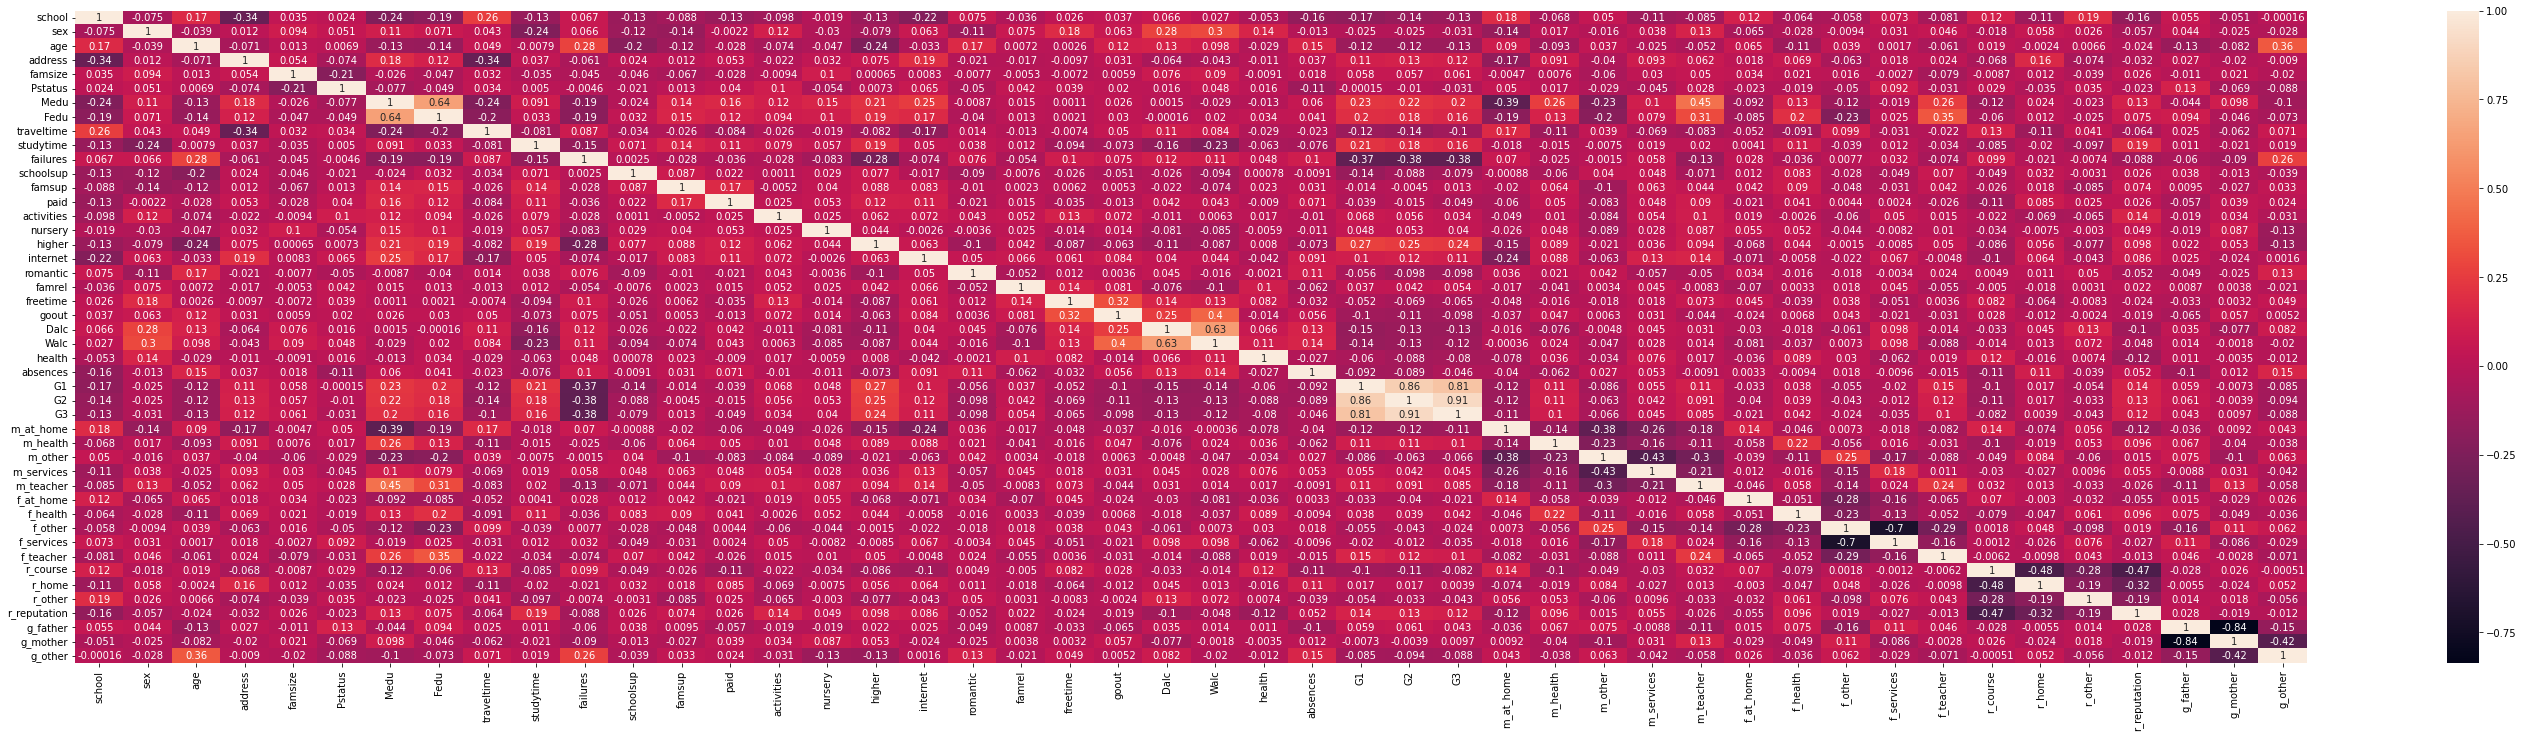

In [ ]:
plt.figure(figsize=(50, 12))
sns.heatmap(data.corr(), annot=True)
plt.show()

# Building the model

## Training

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=0.6, random_state=42)

**Linear Regression**

In [ ]:
model = LinearRegression()
model.fit(X_train, y_train)
prediction = model.predict(X_test)

## Results

In [ ]:
print(f"Model R2: {model.score(X_test, y_test)}")

Model R2: 0.7929947624168348


In [ ]:
print("R2  :", r2_score(y_test, prediction))
print("MAE :", mean_absolute_error(y_test, prediction))
print("MSE :", mean_squared_error(y_test, prediction))

R2  : 0.7929947624168348
MAE : 1.0532870868212523
MSE : 3.133300626912634


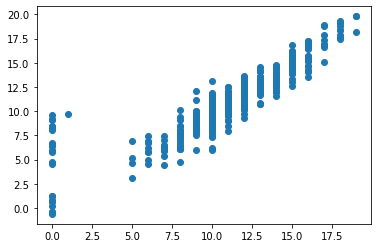

In [ ]:
plt.scatter(y_test, prediction)

In [ ]:
R.fit(X_train,y_train)
prediction = R.predict(X_test)

In [ ]:
R.score(X_test,y_test)

0.7928724645401053

**Random Forrest Regression**

In [ ]:
RF.fit(X_train, y_train)
prediction = RF.predict(X_test)

In [ ]:
print("R2  :", r2_score(y_test, prediction))
print("MAE :", mean_absolute_error(y_test, prediction))
print("MSE :", mean_squared_error(y_test, prediction))

R2  : 0.8283704357538773
MAE : 0.9590430622009569
MSE : 2.597842583732058


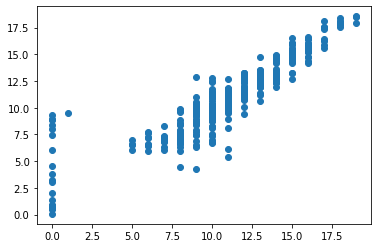

In [ ]:
plt.scatter(y_test, prediction)